# 03__hit_features

in this notebook, i plot boxplots for features aggregated between stringent non hits and hits in our screen.

figures in this notebook:
- Fig 5A-F: boxplots of most significant features
- Fig S6: boxplots of remaining features

In [1]:
import warnings
warnings.filterwarnings('ignore')

import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import re
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import sys
import time

from scipy.stats import spearmanr
from scipy.stats import pearsonr
from statsmodels.sandbox.stats import multicomp

# import utils
sys.path.append("../../../utils")
from plotting_utils import *
from classify_utils import *

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.rcParams['figure.autolayout'] = False

In [2]:
sns.set(**PAPER_PRESET)
fontsize = PAPER_FONTSIZE

In [3]:
np.random.seed(2019)

## variables

In [4]:
data_f = "../../../data/03__features/SuppTable_S5.locus_features.txt"

## 1. import data

In [5]:
data = pd.read_table(data_f, sep="\t")
data.head()

,gene_id,gene_name,csf,cleaner_gene_biotype,minimal_biotype,is_hit,max_eff,max_exp,gc,n_tss,...,rna_len,n_exons,hESC_mean,endo_mean,endo_hESC_abslog2fc,closest_endo_snp_distance,closest_endo_snp_id,closest_endo_snp_disease,DE_enh_tss_dist,DE_enh_tran_dist
0,ENSG00000243485.4_2,MIR1302-2,lncRNA_good_csf,intergenic,lncRNA,no hit,0.208126,0.559674,0.545147,0.0,...,712,3,0.088460,0.000000,0.122288,863464,rs13303010,pancreatic carcinoma,909431,908688
1,ENSG00000237613.2_1,FAM138A,lncRNA_good_csf,intergenic,lncRNA,no hit,0.154032,0.222609,0.465565,0.0,...,1187,3,0.000000,0.480302,0.565892,858492,rs13303010,pancreatic carcinoma,903715,903716
2,ENSG00000238009.6_2,RP11-34P13.7,lncRNA_good_csf,transcript_overlap,lncRNA,no hit,0.688701,2.415708,0.537288,0.0,...,2748,4,0.280988,0.111266,0.205054,760850,rs13303010,pancreatic carcinoma,806073,806074
3,ENSG00000239945.1_2,RP11-34P13.8,lncRNA_good_csf,transcript_overlap,lncRNA,no hit,0.027553,2.987223,0.525398,0.0,...,1319,2,0.207940,0.307150,0.113875,803468,rs13303010,pancreatic carcinoma,848691,848692
4,ENSG00000239906.1_1,RP11-34P13.14,lncRNA_good_csf,promoter_overlap,lncRNA,no hit,0.950739,19.299900,0.461300,0.0,...,323,2,13.451185,15.657979,0.205026,754234,rs13303010,pancreatic carcinoma,799457,799458


## 2. mann whitney tests for each variable

In [6]:
all_feature_cols = ['max_eff', 'max_exp', 'gc', 'n_tss', 'n_enh', 'enh_tss_dist', 'enh_tran_dist', 
                    'DE_enh_tss_dist', 'DE_enh_tran_dist', 'prom_cons',
                    'exon_cons', 'dna_len', 'rna_len', 'n_exons', 'hESC_mean', 'endo_mean', 'endo_hESC_abslog2fc',
                    'closest_endo_snp_distance']

In [7]:
pal = {"stringent no hit": "gray", "hit": "black"}

In [8]:
data.is_hit.value_counts()

no hit              7406
stringent no hit     168
hit                   76
Name: is_hit, dtype: int64

In [9]:
data[data["minimal_biotype"] == "lncRNA"]["is_hit"].value_counts()

no hit              7227
stringent no hit     158
hit                   65
Name: is_hit, dtype: int64

In [10]:
data[data["minimal_biotype"] == "mRNA"]["is_hit"].value_counts()

no hit              179
hit                  11
stringent no hit     10
Name: is_hit, dtype: int64

In [11]:
data[(data["is_hit"] == "hit") & (data["minimal_biotype"] == "mRNA")][["gene_name", "minimal_biotype", "n_tss"]]

,gene_name,minimal_biotype,n_tss
1216,EOMES,mRNA,1.0
1579,ACOX3,mRNA,2.0
2223,STC2,mRNA,2.0
3019,SOX17,mRNA,1.0
3573,FZD8,mRNA,3.0
4629,FOXO1,mRNA,2.0
4965,GSC,mRNA,1.0
6393,GATA6,mRNA,3.0
6479,PMAIP1,mRNA,1.0
6606,SMARCA4,mRNA,4.0


===
max_eff
lncRNA
0.030887466059645877
0.31292234502378324


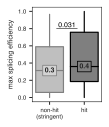

mRNA
0.5262368666518372
0.9575305520514716


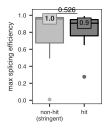

===
max_exp
lncRNA
0.06464525846260118
1.11209878


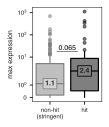

mRNA
0.6220654737597032
30.945959025


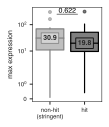

===
gc
lncRNA
0.44488372959930733
0.50435475


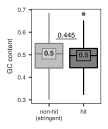

mRNA
0.3981027163512083
0.4555108


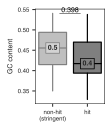

===
n_tss
lncRNA
0.00385725184407275
0.0


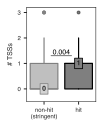

mRNA
0.8819845464318956
2.0


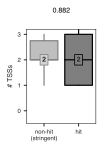

===
n_enh
lncRNA
0.7525973724373647
59.5


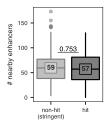

mRNA
0.6720525007251934
59.0


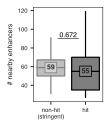

===
enh_tss_dist
lncRNA
0.34788735937127
11440.5


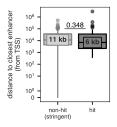

mRNA
0.5732013209481351
1849.5


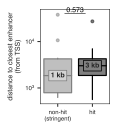

===
enh_tran_dist
lncRNA
0.35262203207761467
7422.5


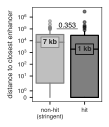

mRNA
0.5381745267980822
313.0


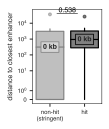

===
DE_enh_tss_dist
lncRNA
0.9508288204350814
119028.5


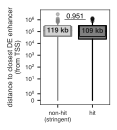

mRNA
0.4385780260809998
10937.0


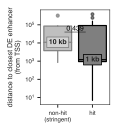

===
DE_enh_tran_dist
lncRNA
0.9890636353647108
111127.5


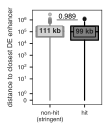

mRNA
0.06675445683379679
9382.0


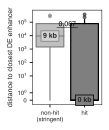

===
prom_cons
lncRNA
0.6427210527956428
0.0


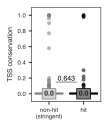

mRNA
0.0058091379251157035
0.0


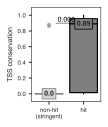

===
exon_cons
lncRNA
0.16798863775986528
0.0045000000000000005


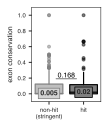

mRNA
0.5760744053036493
0.906025641025641


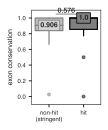

===
dna_len
lncRNA
0.22002293811716378
3560.5


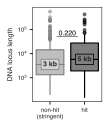

mRNA
0.9438610611705001
27118.0


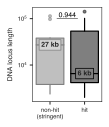

===
rna_len
lncRNA
0.21030168348547573
785.5


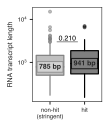

mRNA
0.05726498942466171
1995.5


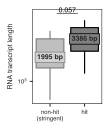

===
n_exons
lncRNA
0.17358333177922702
2.0


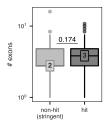

mRNA
0.3953269419976314
7.0


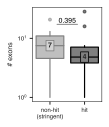

===
hESC_mean
lncRNA
0.19140087354439517
0.2923094680115734


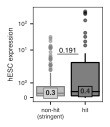

mRNA
0.9438610611705001
3.0792409993666494


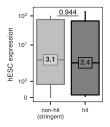

===
endo_mean
lncRNA
0.009753205446350666
0.26178132038056745


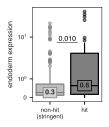

mRNA
0.4385780260809998
57.42942215464127


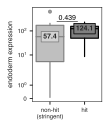

===
endo_hESC_abslog2fc
lncRNA
0.16425259848191165
0.21346188998480614


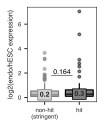

mRNA
0.9438610611705001
5.079656860028816


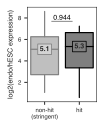

===
closest_endo_snp_distance
lncRNA
0.0037379737850508784
699023.0


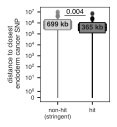

mRNA
0.20496876571978373
349184.5


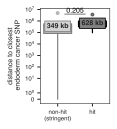

In [12]:
ylabels = ["max splicing efficiency", "max expression", "GC content", "# TSSs", "# nearby enhancers",
           "distance to closest enhancer\n(from TSS)", "distance to closest enhancer", 
           "distance to closest DE enhancer\n(from TSS)", "distance to closest DE enhancer",
           "TSS conservation", "exon conservation", "DNA locus length",
           "RNA transcript length", "# exons", "hESC expression", "endoderm expression", "log2(endo/hESC expression)",
           "distance to closest\n endoderm cancer SNP"]
rounds = [1, 1, 1, 0, 0, "kb", "kb", "kb", "kb", 4, 3, "kb", "bp", 0, 1, 1, 1, "kb"]

logs = [False, True, False, False, False, True, True, True, True, False, False, True, True, True, True, True, 
        False, True]
all_ys = {"lncRNA": [0.8, 18, 0.57, 1.3, 90, 100000, 100000, 1000000, 1000000, 0.15, 0.19, 50000, 3000, 
                     5, 7, 7, 1.8, 5000000],
          "mRNA": [1.02, 250, 0.54, 3.8, 90, 40000, 40000, 40000, 40000, 0.9, 1.05, 100000, 7000, 20, 
                   100, 250, 7.7, 4000000]}
plotnames = ["Fig5E", "Fig5F", "FigS6H", "Fig5C", "FigS6J", "FigS6G", None, "FigS6K", None, "FigS6I", 
             "FigS6B", "FigS6F", "FigS6E", "FigS6C", "FigS6D", "Fig5D", "FigS6A", "Fig5B"]
all_pvals = {"lncRNA": {}, "mRNA": {}}
for i, col in enumerate(all_feature_cols):
    print("===")
    print(col)
    log = logs[i]
    ylabel = ylabels[i]
    plotname = plotnames[i]
    for biotype in ["lncRNA", "mRNA"]:
        print(biotype)
        y = all_ys[biotype][i]

        fig = plt.figure(figsize=(1.25, 1.75))
        sub = data[data["minimal_biotype"] == biotype]
        ax = sns.boxplot(data=sub, x="is_hit", y=col,
                         flierprops = dict(marker='o', markersize=3), order=["stringent no hit", "hit"], 
                         palette=pal)
        mimic_r_boxplot(ax)
        ax.set_xlabel("")
        ax.set_ylabel(ylabel)
        ax.set_xticklabels(["non-hit\n(stringent)", "hit"])

        # calc p-vals b/w dists
        dist1 = np.asarray(sub[sub["is_hit"] == "stringent no hit"][col])
        dist2 = np.asarray(sub[sub["is_hit"] == "hit"][col])

        dist1 = dist1[~np.isnan(dist1)]
        dist2 = dist2[~np.isnan(dist2)]

        u, pval = stats.mannwhitneyu(dist1, dist2, alternative="two-sided", use_continuity=False)
        print(pval)
        med1 = np.median(dist1)
        med2 = np.median(dist2)
        print(med1)
        
        r = rounds[i]
        if r in [1, 2, 3, 4]:
            txt1 = round(med1, r)
            txt2 = round(med2, r)
        elif r == 0:
            txt1 = int(med1)
            txt2 = int(med2)
        elif r == "bp":
            txt1 = "%s bp" % int(med1)
            txt2 = "%s bp" % int(med2)
        else:
            kb1 = med1/1000
            kb2 = med2/1000
            txt1 = "%s kb" % int(kb1)
            txt2 = "%s kb" % int(kb2)
            
        ax.text(0, med1, txt1, ha="center", va="center", fontweight="bold",
                bbox=dict(facecolor="lightgray", pad=2, edgecolor="gray"))
        ax.text(1, med2, txt2, ha="center", va="center", fontweight="bold",
                bbox=dict(facecolor="gray", pad=2, edgecolor="black"))
        
        
        tmp = all_pvals[biotype]
        tmp[col] = pval
            
        annotate_pval(ax, 0.2, 0.8, y, 0, y, pval, fontsize)

        if log:
            ax.set_yscale("symlog")
            
        if col == "n_tss":
            ax.set_ylim((-0.5, 3.2))
        if col == "prom_cons" or col == "exon_cons":
            ax.set_ylim((-0.1, 1.1))

        plt.show()
        if biotype == "lncRNA":
            if plotname != None:
                fig.savefig("%s.pdf" % plotname, dpi="figure", bbox_inches="tight")

In [13]:
lncrna_pvals = pd.DataFrame.from_dict(all_pvals["lncRNA"], orient="index")
lncrna_pvals = lncrna_pvals.drop(["enh_tran_dist", "DE_enh_tran_dist"])
lncrna_pvals.columns = ["pval"]
lncrna_pvals["padj"] = multicomp.multipletests(lncrna_pvals["pval"], method="fdr_bh")[1]
lncrna_pvals.sort_values(by="pval")

,pval,padj
closest_endo_snp_distance,0.003738,0.030858
n_tss,0.003857,0.030858
endo_mean,0.009753,0.052017
max_eff,0.030887,0.123550
max_exp,0.064645,0.206865
endo_hESC_abslog2fc,0.164253,0.320033
exon_cons,0.167989,0.320033
n_exons,0.173583,0.320033
hESC_mean,0.191401,0.320033
rna_len,0.210302,0.320033


In [14]:
mrna_pvals = pd.DataFrame.from_dict(all_pvals["mRNA"], orient="index")
mrna_pvals.columns = ["pval"]
mrna_pvals.sort_values(by="pval")

,pval
prom_cons,0.005809
rna_len,0.057265
DE_enh_tran_dist,0.066754
closest_endo_snp_distance,0.204969
n_exons,0.395327
gc,0.398103
DE_enh_tss_dist,0.438578
endo_mean,0.438578
max_eff,0.526237
enh_tran_dist,0.538175


## take a look at hits

In [15]:
data.columns

Index(['gene_id', 'gene_name', 'csf', 'cleaner_gene_biotype',
       'minimal_biotype', 'is_hit', 'max_eff', 'max_exp', 'gc', 'n_tss',
       'n_enh', 'enh_tss_dist', 'enh_tran_dist', 'prom_cons', 'exon_cons',
       'dna_len', 'rna_len', 'n_exons', 'hESC_mean', 'endo_mean',
       'endo_hESC_abslog2fc', 'closest_endo_snp_distance',
       'closest_endo_snp_id', 'closest_endo_snp_disease', 'DE_enh_tss_dist',
       'DE_enh_tran_dist'],
      dtype='object')

In [16]:
tmp = data[(data["is_hit"] == "hit") & (data["minimal_biotype"] == "lncRNA")][["gene_name", "cleaner_gene_biotype",
                                                                               "max_eff", "max_exp", "enh_tss_dist",
                                                                               "n_tss", "n_enh",
                                                                               "prom_cons", "exon_cons", "hESC_mean",
                                                                               "endo_mean", "endo_hESC_abslog2fc",
                                                                               "closest_endo_snp_distance",
                                                                               "DE_enh_tss_dist"]]
tmp.sort_values(by="endo_hESC_abslog2fc", ascending=False).head(10)

,gene_name,cleaner_gene_biotype,max_eff,max_exp,enh_tss_dist,n_tss,n_enh,prom_cons,exon_cons,hESC_mean,endo_mean,endo_hESC_abslog2fc,closest_endo_snp_distance,DE_enh_tss_dist
243,FOXD3-AS1,transcript_overlap,0.976705,339.448009,1751,2.0,24.0,0.98,0.333333,134.634460,0.065131,7.042090,748849,67405
3055,RP11-1144P22.1,intergenic,0.961638,235.089440,1615,1.0,44.0,0.12,0.113333,235.851942,6.182796,5.167452,365783,344390
4813,CTD-2058B24.2,transcript_overlap,0.336024,0.535773,17290,0.0,23.0,0.00,0.020000,294.614131,58.047282,3.090330,1146081,9946
1636,DANCR,intergenic,0.995823,419.830264,123966,2.0,24.0,0.02,0.015000,260.464837,40.562025,2.781922,240907,318570
7649,DIGIT,promoter_overlap,0.224504,0.639554,2518,0.0,72.0,0.10,0.000000,0.012711,4.846082,2.529248,702503,1638
1215,RP11-222K16.2,intergenic,0.198284,0.692366,2183,1.0,36.0,0.00,0.000000,0.000000,3.394871,2.135821,427188,0
3246,VLDLR-AS1,transcript_overlap,0.752942,3.313811,1004,1.0,37.0,0.18,0.625000,21.092685,7.920570,1.698788,0,23172
4985,MEG3,transcript_overlap,0.999051,1107.726727,3902,2.0,81.0,0.11,0.435000,0.117604,5.164588,1.132933,164856,0
2211,RP11-541P9.3,promoter_overlap,0.502258,1.043472,52871,2.0,20.0,0.00,0.023333,0.218981,1.781765,1.102369,0,2427
1978,RP11-479O16.1,transcript_overlap,0.082878,0.093045,21688,0.0,74.0,0.00,0.000000,0.448650,1.618511,0.854038,294845,80147
